## IMPORTS


In [102]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tqdm
import pickle

## Config for the libraries


In [103]:
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Setting up Variables


In [104]:
ROOT_PATH = os.path.dirname(os.path.dirname(
    os.path.abspath("visualize_data.ipynb")))
DATA_PATH = os.path.join(ROOT_PATH, "player-recommendation", "data")
DATA_DESC = {
    'Rk': 'Rank',
    'Player': "Player's name",
    'Nation': "Player's nation",
    'Pos': 'Position',
    'Squad': "Squad’s name",
    'Comp': 'League that squat occupies',
    'Age': "Player's age",
    'Born': 'Year of birth',
    'MP': 'Matches played',
    'Starts': 'Matches started',
    'Min': 'Minutes played',
    '90s': 'Minutes played divided by 90',
    'Goals': 'Goals scored or allowed',
    'Shots': 'Shots total (Does not include penalty kicks)',
    'SoT': 'Shots on target (Does not include penalty kicks)',
    'SoT%': 'Shots on target percentage (Does not include penalty kicks)',
    'G/Sh': 'Goals per shot',
    'G/SoT': 'Goals per shot on target (Does not include penalty kicks)',
    'ShoDist': 'Average distance, in yards, from goal of all shots taken (Does not include penalty kicks)',
    'ShoFK': 'Shots from free kicks',
    'ShoPK': 'Penalty kicks made',
    'PKatt': 'Penalty kicks attempted',
    'PasTotCmp': 'Passes completed',
    'PasTotAtt': 'Passes attempted',
    'PasTotCmp%': 'Pass completion percentage',
    'PasTotDist': 'Total distance, in yards, that completed passes have traveled in any direction',
    'PasTotPrgDist': 'Total distance, in yards, that completed passes have traveled towards the opponent\'s goal',
    'PasShoCmp': 'Passes completed (Passes between 5 and 15 yards)',
    'PasShoAtt': 'Passes attempted (Passes between 5 and 15 yards)',
    'PasShoCmp%': 'Pass completion percentage (Passes between 5 and 15 yards)',
    'PasMedCmp': 'Passes completed (Passes between 15 and 30 yards)',
    'PasMedAtt': 'Passes attempted (Passes between 15 and 30 yards)',
    'PasMedCmp%': 'Pass completion percentage (Passes between 15 and 30 yards)',
    'PasLonCmp': 'Passes completed (Passes longer than 30 yards)',
    'PasLonAtt': 'Passes attempted (Passes longer than 30 yards)',
    'PasLonCmp%': 'Pass completion percentage (Passes longer than 30 yards)',
    'Assists': 'Assists',
    'PasAss': 'Passes that directly lead to a shot (assisted shots)',
    'Pas3rd': 'Completed passes that enter the 1/3 of the pitch closest to the goal',
    'PPA': 'Completed passes into the 18-yard box',
    'CrsPA': 'Completed crosses into the 18-yard box',
    'PasProg': 'Completed passes that move the ball towards the opponent\'s goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area',
    'PasAtt': 'Passes attempted',
    'PasLive': 'Live-ball passes',
    'PasDead': 'Dead-ball passes',
    'PasFK': 'Passes attempted from free kicks',
    'TB': 'Completed pass sent between back defenders into open space',
    'Sw': 'Passes that travel more than 40 yards of the width of the pitch',
    'PasCrs': 'Crosses',
    'TI': 'Throw-Ins taken',
    'CK': 'Corner kicks',
    'CkIn': 'Inswinging corner kicks',
    'CkOut': 'Outswinging corner kicks',
    'CkStr': 'Straight corner kicks',
    'PasCmp': 'Passes completed',
    'PasOff': 'Offsides',
    'PasBlocks': 'Blocked by the opponent who was standing it the path',
    'SCA': 'Shot-creating actions',
    'ScaPassLive': 'Completed live-ball passes that lead to a shot attempt',
    'ScaPassDead': 'Completed dead-ball passes that lead to a shot attempt',
    'ScaDrib': 'Successful dribbles that lead to a shot attempt',
    'ScaSh': 'Shots that lead to another shot attempt',
    'ScaFld': 'Fouls drawn that lead to a shot attempt',
    'ScaDef': 'Defensive actions that lead to a shot attempt',
    'GCA': 'Goal-creating actions',
    'GcaPassLive': 'Completed live-ball passes that lead to a goal',
    'GcaPassDead': 'Completed dead-ball passes that lead to a goal',
    'GcaDrib': 'Successful dribbles that lead to a goal',
    'GcaSh': 'Shots that lead to another goal-scoring shot',
    'GcaFld': 'Fouls drawn that lead to a goal',
    'GcaDef': 'Defensive actions that lead to a goal',
    'Tkl': 'Number of players tackled',
    'TklWon': 'Tackles in which the tackler\'s team won possession of the ball',
    'TklDef3rd': 'Tackles in defensive 1/3',
    'TklMid3rd': 'Tackles in middle 1/3',
    'TklAtt3rd': 'Tackles in attacking 1/3',
    'TklDri': 'Number of dribblers tackled',
    'TklDriAtt': 'Number of times dribbled past plus number of tackles',
    'TklDri%': 'Percentage of dribblers tackled',
    'TklDriPast': 'Number of times dribbled past by an opposing player',
    'Blocks': 'Number of times blocking the ball by standing in its path',
    'BlkSh': 'Number of times blocking a shot by standing in its path',
    'BlkPass': 'Number of times blocking a pass by standing in its path',
    'Int': 'Interceptions',
    'Tkl+Int': 'Number of players tackled plus number of interceptions',
    'Clr': 'Clearances',
    'Err': 'Mistakes leading to an opponent\'s shot',
    'Touches': 'Number of times a player touched the ball. Note: Receiving a pass, then dribbling, then sending a pass counts as one touch',
    'TouDefPen': 'Touches in defensive penalty area',
    'TouDef3rd': 'Touches in defensive 1/3',
    'TouMid3rd': 'Touches in middle 1/3',
    'TouAtt3rd': 'Touches in attacking 1/3',
    'TouAttPen': 'Touches in attacking penalty area',
    'TouLive': 'Live-ball touches. Does not include corner kicks, free kicks, throw-ins, kick-offs, goal kicks or penalty kicks.',
    'ToAtt': 'Number of attempts to take on defenders while dribbling',
    'ToSuc': 'Number of defenders taken on successfully, by dribbling past them',
    'ToSuc%': 'Percentage of take-ons Completed Successfully',
    'ToTkl': 'Number of times tackled by a defender during a take-on attempt',
    'ToTkl%': 'Percentage of time tackled by a defender during a take-on attempt',
    'Carries': 'Number of times the player controlled the ball with their feet',
    'CarTotDist': 'Total distance, in yards, a player moved the ball while controlling it with their feet, in any direction',
    'CarPrgDist': 'Total distance, in yards, a player moved the ball while controlling it with their feet towards the opponent\'s goal',
    'CarProg': 'Carries that move the ball towards the opponent\'s goal at least 5 yards, or any carry into the penalty area',
    'Car3rd': 'Carries that enter the 1/3 of the pitch closest to the goal',
    'CPA': 'Carries into the 18-yard box',
    'CarMis': 'Number of times a player failed when attempting to gain control of a ball',
    'CarDis': 'Number of times a player loses control of the ball after being tackled by an opposing player',
    'Rec': 'Number of times a player successfully received a pass',
    'RecProg': 'Completed passes that move the ball towards the opponent\'s goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area',
    'CrdY': 'Yellow cards',
    'CrdR': 'Red cards',
    '2CrdY': 'Second yellow card',
    'Fls': 'Fouls committed',
    'Fld': 'Fouls drawn',
    'Off': 'Offsides',
    'Crs': 'Crosses',
    'TklW': 'Tackles in which the tackler\'s team won possession of the ball',
    'PKwon': 'Penalty kicks won',
    'PKcon': 'Penalty kicks conceded',
    'OG': 'Own goals',
    'Recov': 'Number of loose balls recovered',
    'AerWon': 'Aerials won',
    'AerLost': 'Aerials lost',
    'AerWon%': 'Percentage of aerials won'
}

## Importing Data from CSV files


In [105]:
df = pd.read_csv(os.path.join(DATA_PATH,
                              "2022-2023 Football Player Stats.csv"), encoding='latin-1', delimiter=';')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 124 entries, Rk to AerWon%
dtypes: float64(112), int64(7), object(5)
memory usage: 2.5+ MB


,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,1345.000000,26.011157,1996.155820,11.833023,8.476013,760.451097,8.450465,1.027520,1.245787,0.411261,24.222164,0.064210,0.167374,14.141726,0.035920,0.008111,0.010945,33.348204,42.701882,75.489773,577.364187,198.385950,15.389275,17.784968,84.270807,13.590718,16.197352,78.697285,3.269732,5.964154,51.159799,0.083466,0.866936,2.529621,0.738103,0.197713,3.331097,42.701882,38.572090,3.955508,1.005110,0.108167,0.312916,1.661636,1.832904,0.41315,0.175627,0.157441,0.003079,33.348204,0.173871,0.913009,2.071179,1.498059,0.167683,0.112588,0.14881,0.108676,0.035459,0.209583,0.144102,0.010242,0.013942,0.026021,0.012622,0.00267,1.701655,0.990569,0.816422,0.648635,0.236664,0.750398,1.444533,44.535106,0.694080,1.079762,0.275385,0.804522,0.820331,2.521261,1.574704,0.022350,53.651023,4.613027,15.713856,24.237754,14.262763,2.161078,53.639903,1.817869,0.729093,34.399702,0.860033,37.415210,31.611711,170.765946,82.638732,1.679989,1.270476,0.434883,1.682049,1.056794,34.369636,3.970714,0.246222,0.020688,0.006761,1.319788,1.146991,0.204697,1.661636,0.990569,0.009249,0.015173,0.003142,4.951967,1.312064,1.497356,43.583600
std,776.391761,4.446259,4.450108,6.864278,6.994383,591.094260,6.567484,2.013714,1.424619,0.754716,24.249242,0.118826,0.263501,8.677582,0.198595,0.041589,0.051776,17.027779,18.447543,13.113075,324.007185,145.782161,8.486637,9.050574,15.280160,9.142460,9.683369,19.294651,2.952956,4.975162,24.030708,0.276581,1.078650,2.207206,1.065411,0.518301,2.629106,18.447543,17.567568,4.005617,1.176429,0.381662,0.566358,2.319000,3.333445,1.07893,0.643655,0.504091,0.028629,17.027779,0.407284,1.087060,1.913766,1.453089,0.480929,0.447581,0.45827,0.270573,0.156976,0.462712,0.344309,0.052678,0.136515,0.249190,0.0548

## Checking if there are any null values


In [106]:
[feature for feature in df.columns if df[feature].isnull().sum() > 0]

['Nation']

## By the league


[Text(0.5, 1.0, 'Number of players in each league from the dataset'),
 Text(0.5, 0, 'League'),
 Text(0, 0.5, 'Count')]

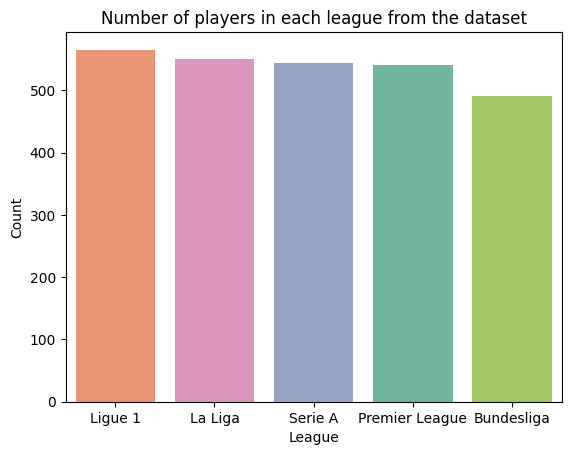

In [107]:
data_by_leagues = df.Comp.value_counts().index.tolist()
sns.countplot(x='Comp', data=df, label='Count', order=data_by_leagues, hue='Comp', palette='Set2').set(
    title='Number of players in each league from the dataset', xlabel='League', ylabel='Count')

## By the teams/squads


In [108]:
# create a new dataframe from the value counts output
squad_counts = pd.DataFrame(df.Squad.value_counts())

# rename the column
squad_counts.columns = ['Count']

# create a column from the index
squad_counts.reset_index(inplace=True)
squad_counts.index = range(1, len(squad_counts)+1)

display(squad_counts)

,Squad,Count
1,Cádiz,34
2,Schalke 04,34
3,Hellas Verona,34
4,Sevilla,33
5,Spezia,33
6,Augsburg,33
7,Nott'ham Forest,33
8,Ajaccio,33
9,Rennes,32
10,Valladolid,32


In [109]:
forward_features = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis"]
midfielder_features = ["Goals", "PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov", "Carries", "CarTotDist", "CarPrgDist", "Fld"]
defender_features = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks",
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR", "Fls", "Clr"]

general_info = ["Player", "Nation", "Pos", "Squad", "Age", "Born"]
playing_time = ["MP", "Starts", "Min"]
goals_info = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "ShoPK", "PKatt", "GCA",
              "SCA", "Off", "PKwon", "PKcon"]

passes_info = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Assists",
               "PasAss", "Pas3rd", "PPA", "PasCrs", "CrsPA", "PasAtt", "PasLive", "PasDead", "PasOff",
               "PasBlocks", "Crs"]
skill_info = ["SCA", "ScaDrib", "ScaFld", "ToAtt", "ToSuc", "Carries",
              "CarTotDist", "CarPrgDist", "Car3rd", 'CPA', "CarMis", "CarDis", "Fld"]
defense_info = ["Tkl", "TklWon", "TklDri", "Blocks", "Int", "Clr", "Err", "CrdY", "CrdR", "Fls", "OG", "Recov", "AerWon",
                "AerLost"]

In [110]:
# checking for duplicates
df['Player'].duplicated().sum()

# list duplicates
df[df['Player'].duplicated()]

df[df['Player'] == 'Youcef Belaïli']

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
237,238,Youcef Belaïli,ALG,MFFW,Ajaccio,Ligue 1,30,1992,12,10,780,8.7,5,2.18,0.69,31.6,0.05,0.17,21.9,0.23,0.46,0.57,25.9,35.9,72.1,437.9,170.9,12.5,15.5,80.7,8.05,10.7,75.3,3.33,6.09,54.7,0.34,1.72,2.76,1.95,0.34,4.02,35.9,30.2,5.4,2.18,0.23,0.23,3.68,1.03,1.38,0.34,0.57,0.0,25.9,0.23,0.80,3.79,1.72,0.8,0.23,0.46,0.57,0.0,1.03,0.46,0.0,0.23,0.11,0.23,0.0,1.61,1.03,0.11,0.8,0.69,0.69,1.38,50.0,0.69,0.92,0.11,0.8,0.23,1.84,0.46,0.0,49.4,0.34,4.71,23.0,22.4,5.06,48.9,4.14,1.72,41.7,1.84,44.4,36.8,240.2,94.6,2.64,1.95,1.84,3.91,1.38,34.3,5.75,0.00,0.0,0.0,1.72,1.95,0.46,3.68,1.03,0.23,0.0,0.0,4.71,0.57,0.80,41.7
238,239,Youcef Belaïli,ALG,FWMF,Brest,Ligue 1,30,1992,6,4,356,4.0,0,2.25,0.25,11.1,0.00,0.00,16.0,0.25,0.00,0.00,28.5,39.5,72.2,556.0,142.3,11.8,13.0,90.4,10.50,12.5,84.0,5.00,10.50,47.6,0.50,2.00,1.00,2.00,0.25,3.50,39.5,34.0,5.5,1.75,0.25,1.75,5.25,0.25,3.50,2.50,1.00,0.0,28.5,0.00,1.75,3.75,2.00,1.5,0.00,0.00,0.25,0.0,0.50,0.00,0.5,0.00,0.00,0.00,0.0,1.25,0.50,0.75,0.5,0.00,0.50,1.75,28.6,1.25,0.50,0.00,0.5,0.25,1.50,0.25,0.0,53.0,0.50,5.50,21.0,27.5,3.25,53.0,3.75,1.00,26.7,1.75,46.7,37.3,255.8,121.0,4.00,2.50,1.00,4.00,1.00,36.0,7.75,0.75,0.0,0.0,2.75,2.00,0.50,5.25,0.50,0.00,0.0,0.0,4.75,0.50,0.25,66.7


In [111]:
# dropping duplicates
# or make them unique by adding club name
# as players can move from one club to another in the same season
# as shown in the figure

# df.drop_duplicates(subset='Player', inplace=True)

players = []

for i in range(len(df)):
    players.append(df['Player'][i] +
                   " " + f"({df['Squad'][i]})")

players_ID = dict(zip(players, df.index))
players_ID

{'Brenden Aaronson (Leeds United)': 0,
 'Yunis Abdelhamid (Reims)': 1,
 'Himad Abdelli (Angers)': 2,
 'Salis Abdul Samed (Lens)': 3,
 'Laurent Abergel (Lorient)': 4,
 'Oliver Abildgaard (Hellas Verona)': 5,
 'Matthis Abline (Auxerre)': 6,
 'Matthis Abline (Rennes)': 7,
 'Abner (Betis)': 8,
 'Zakaria Aboukhlal (Toulouse)': 9,
 'Tammy Abraham (Roma)': 10,
 'Francesco Acerbi (Inter)': 11,
 'Mohamed Achi (Nantes)': 12,
 'Marcos Acuña (Sevilla)': 13,
 'Che Adams (Southampton)': 14,
 'Tyler Adams (Leeds United)': 15,
 'Sargis Adamyan (Köln)': 16,
 'Tosin Adarabioyo (Fulham)': 17,
 'Martin Adeline (Reims)': 18,
 'Karim Adeyemi (Dortmund)': 19,
 'Amine Adli (Leverkusen)': 20,
 'Yacine Adli (Milan)': 21,
 'Michel Aebischer (Bologna)': 22,
 'Felix Afena-Gyan (Cremonese)': 23,
 'Emmanuel Agbadou (Reims)': 24,
 'Lucien Agoume (Troyes)': 25,
 'Felix Agu (Werder Bremen)': 26,
 'Álvaro Aguado (Valladolid)': 27,
 'Kevin Agudelo (Spezia)': 28,
 'Nayef Aguerd (West Ham)': 29,
 'Ruben Aguilar (Monaco)': 

/Users/beyond/Desktop/Projects/player-recommendation-demo/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'Age Distribution')

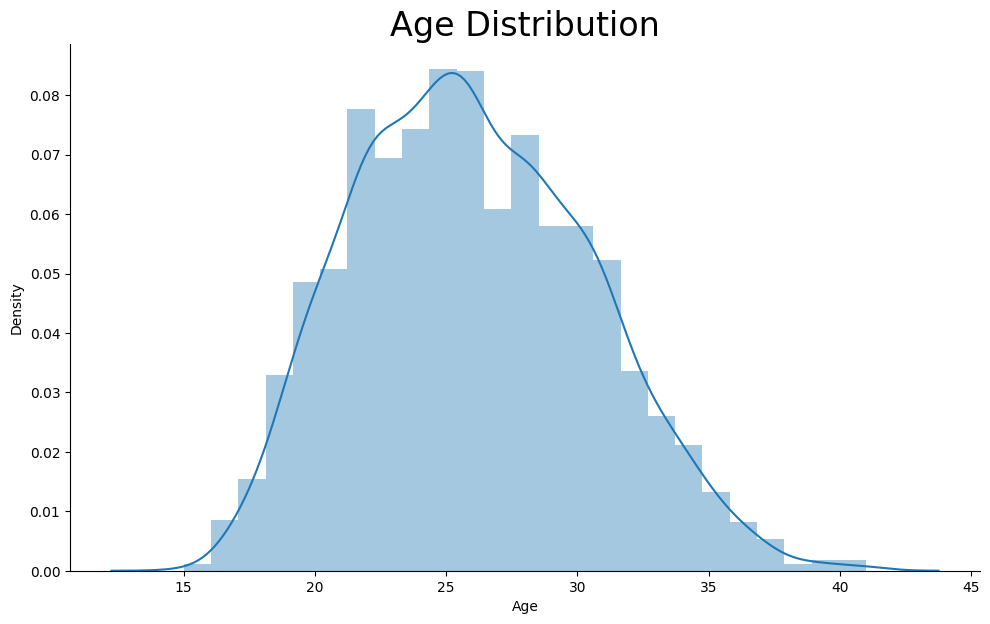

In [112]:
sns.FacetGrid(df, height=6, aspect=10 /
              6).map(sns.distplot, 'Age', bins=25)
plt.title("Age Distribution", size=24)

Text(0.5, 1.0, 'Age variance among leagues')

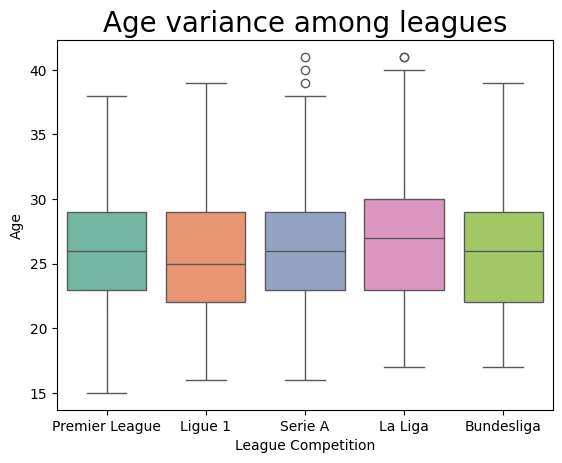

In [113]:
ax = sns.boxplot(x='Comp', y='Age', hue='Comp', data=df,
                 palette='Set2')
plt.xlabel('League Competition')
plt.title('Age variance among leagues', size=20)

Standardized data [[-1.36685925e-02  1.99538528e-01 -1.73952938e-01 ... -3.16987108e-02
  -6.15524478e-01 -1.67949399e-01]
 [-5.10355690e-01 -2.70850217e-01 -4.78759923e-01 ...  5.81820673e-01
   5.49589220e-01 -1.46092079e-01]
 [-5.10355690e-01 -1.37456394e-01 -8.11855946e-02 ...  1.09883139e+00
  -2.41928238e-01 -2.44450016e-01]
 ...
 [ 3.46314109e+00  1.04202583e+00  5.94690764e-01 ...  8.20436468e-02
  -5.26874523e-01 -4.35701561e-01]
 [-1.36685925e-02 -1.51497849e-01 -2.00457893e-01 ... -1.00023212e+00
   8.35078529e+00  1.14348976e+00]
 [ 4.83018505e-01 -6.02283908e-02  9.10966145e-02 ...  6.21540836e-03
  -4.88881685e-01 -3.37343624e-01]]


Text(0.5, 1.0, 't-SNE - Outfield players')

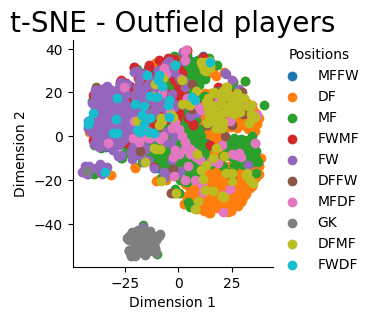

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# selecting only numerical metrics
stats = df.iloc[:, 12:-1]
# position types
labels = df['Pos']

# standardizing the data
data = StandardScaler().fit_transform(stats)
print('Standardized data', data)

# configuring tSNE params
model = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_data = model.fit_transform(data)

# creating a new df to plot the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=(
    "Dimension 1", "Dimension 2", "Positions"))

# ploting the result of tSNE
ax = sns.FacetGrid(tsne_df, hue="Positions", aspect=20/20)\
        .map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.title('t-SNE - Outfield players', size=20)

Text(0.5, 1.0, 'PCA: components selection')

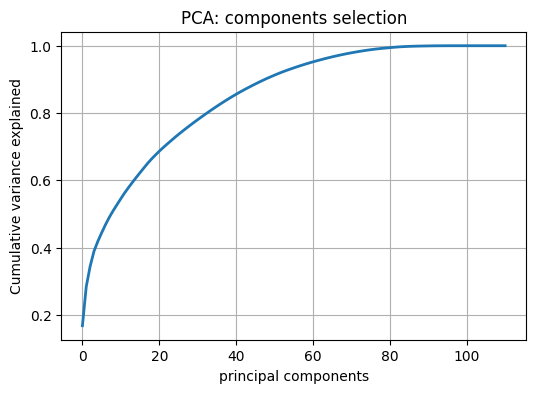

In [115]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

# standardizing the data
data = StandardScaler().fit_transform(stats)

# setting up and running PCA
pca = decomposition.PCA()
pca.n_components = 111
pca_data = pca.fit_transform(data)

# % variance explained per components
percentage_var_explained = pca.explained_variance_ / \
    np.sum(pca.explained_variance_)

# cumulative variance explained
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('principal components')
plt.ylabel('Cumulative variance explained')
plt.title('PCA: components selection')

Text(0.5, 1.0, 'Position distribution among leagues')

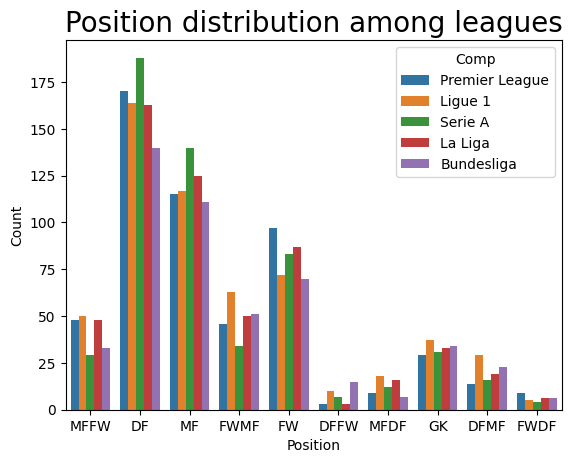

In [118]:
sns.countplot(x='Pos', hue='Comp', data=df)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Position distribution among leagues', size=20)

In [116]:
stats = pca_data[:, :80]

In [119]:
from scipy.spatial import distance
import numpy as np

# fetch the player vector


def getStats(name):
    idx = player_ID[name]
    return stats[idx, :]

# fetch cosine similarity between two player vectors


def similarity(player1, player2):
    return 1 - distance.cosine(getStats(player1), getStats(player2))

# normalize an array to a scale of 0 to 100


def normalize(array):
    return np.array([round(num, 2) for num in (array - min(array))*100/(max(array)-min(array))])


# player-similarities hash table
engine = {}
for query in tqdm(players):
    metric = []
    for player in players:
        value = similarity(query, player)
        metric.append(value)
    metric = normalize(metric)
    # adding normalized similarity values to the 'player name' key
    engine[query] = metric

# saving hash table/dict as a pickle
with open(r'data\engine.pickle', 'wb') as file:
    pickle.dump(engine, file)

TypeError: 'module' object is not callable